# Wikipedia Notable Life Expectancies

# [Notebook 5 of : Data Cleaning](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean4_thanak_2022_06_23.ipynb)

## Context

The


## Objective

The

### Data Dictionary

- Feature: Description

## Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np
import re

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### Reading, Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean3.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean3", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 132652 rows and 24 columns.


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,None,dancer,ballet designer and director,None,None,None,None,None,None,None,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,None,economist,writer,and academic,None,None,None,None,None,None,None,68.0,None,Ireland,None,None


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
132650,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2,2022,June,,None,volleyball player,Olympic champion and coach,None,None,None,None,None,None,None,None,69.0,None,Russia,None,1980
132651,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,None,engineer,member of the Academy of Engineering,None,None,None,None,None,None,None,None,86.0,None,"China, People's Republic of",None,None


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
10284,25,Paul M. O'Leary,", 96, American economist and educator.",https://en.wikipedia.org/wiki/Paul_M._O%27Leary,4,1997,December,None,None,economist and educator,None,None,None,None,None,None,None,None,None,96.0,None,United States of America,None,None
116244,8,Alex Trebek,", 80, Canadian-American game show host , seven-time winner, pancreatic cancer.",https://en.wikipedia.org/wiki/Alex_Trebek,204,2020,November,"Emmy, ,",None,game show host,seven time winner,pancreatic cancer,None,None,None,None,None,None,None,80.0,None,Canada,United States of America,"Emmy, ,"
105911,27,Dante Bernini,", 97, Italian Roman Catholic prelate, Bishop of Velletri-Segni .",https://en.wikipedia.org/wiki/Dante_Bernini,1,2019,September,and Albano,None,Catholic prelate,Bishop of Velletri Segni,None,None,None,None,None,None,None,None,97.0,None,Italy,Italy,1981 1982 and Albano 1982 1999
25513,15,Yoko Watanabe,", 51, Japanese operatic soprano.",https://en.wikipedia.org/wiki/Yoko_Watanabe,1,2004,July,None,None,operatic soprano,None,None,None,None,None,None,None,None,None,51.0,None,Japan,None,None
128668,5,Mohamed Hilmi,", 90, Algerian film director and actor.",https://en.wikipedia.org/wiki/Mohamed_Hilmi,3,2022,January,None,None,film director and actor,None,None,None,None,None,None,None,None,None,90.0,None,Algeria,None,None


<IPython.core.display.Javascript object>

### Checking Data Types, Duplicates, and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132652 entries, 0 to 132651
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day                132652 non-null  object 
 1   name               132652 non-null  object 
 2   info               132652 non-null  object 
 3   link               132652 non-null  object 
 4   num_references     132652 non-null  object 
 5   year               132652 non-null  int64  
 6   month              132652 non-null  object 
 7   info_parenth       49830 non-null   object 
 8   info_1             35 non-null      object 
 9   info_2             132604 non-null  object 
 10  info_3             62571 non-null   object 
 11  info_4             12605 non-null   object 
 12  info_5             1497 non-null    object 
 13  info_6             216 non-null     object 
 14  info_7             31 non-null      object 
 15  info_8             6 non-null       object 
 16  in

<IPython.core.display.Javascript object>

#### Observations:
- Due to the diversity of entries for `known_for`, we may need to prioritize entries for the extraction of this feature.
- To do so, we will proceed with typecasting num_references as integer, so we can determine which entries have more references.
- We will also make a copy of the `info_parenth` column, as we will alter that column and the information it contains is no longer present in the original `info` column.

#### Typecasting `num_references` as Integer

In [6]:
# Typecasting num_references as int64
df.loc[:, "num_references"] = df.loc[:, "num_references"].astype("int64")

<IPython.core.display.Javascript object>

### `num_references`

In [7]:
df["num_references"].describe()

count    132652.000000
mean          9.790406
std          19.436805
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         837.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

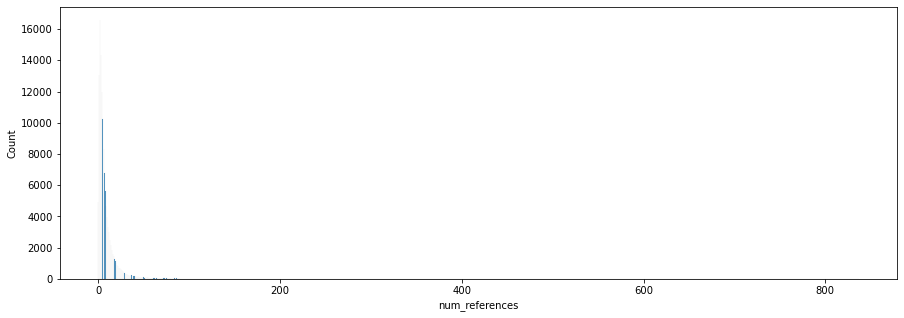

<IPython.core.display.Javascript object>

In [8]:
# Histplot of num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` is highly right skewed.
- We will verify some verifying of links to make sure the pages are for individuals.

In [9]:
# Example of verifying links (repeated in groups of 100 until num_references <100)
df.sort_values(by="num_references", ascending=False)[:10]

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
36579,19,Bill Andress,", 83, American baseball umpire.",https://en.wikipedia.org/wiki/Bill_Andress,837,2008,May,None,None,baseball umpire,None,None,None,None,None,None,None,None,None,83.0,None,United States of America,None,None
11356,14,Frank Sinatra,", 82, American singer , heart attack.",https://en.wikipedia.org/wiki/Frank_Sinatra,660,1998,May,"""My Way"", ""That Life"" and actor Oscar, winner",None,singer,heart attack,None,None,None,None,None,None,None,None,82.0,None,United States of America,None,"""My Way"", ""That Life"" and actor Oscar, 1954 winner"
35265,17,Bobby Fischer,", 64, American chess grandmaster, world champion , kidney failure.",https://en.wikipedia.org/wiki/Bobby_Fischer,631,2008,January,,None,chess grandmaster,world champion,kidney failure,None,None,None,None,None,None,None,64.0,None,United States of America,None,1972 1975
26014,11,Keith Miller,", 84, Australian Test cricketer, Australian rules footballer, fighter pilot and journalist.",https://en.wikipedia.org/wiki/Keith_Miller,586,2004,October,None,None,Test cricketer,rules footballer,fighter pilot and journalist,None,None,None,None,None,None,None,84.0,None,Australia,Australia,None
35003,28,Benazir Bhutto,", 54, Pakistani opposition leader and former prime minister , assassinated.",https://en.wikipedia.org/wiki/Benazir_Bhutto,554,2007,December,",",None,opposition leader and former prime minister,assassinated,None,None,None,None,None,None,None,None,54.0,None,Pakistan,None,"1988 1990, 1993 1996"
85511,25,Fidel Castro,", 90, Cuban politician, Prime Minister .",https://en.wikipedia.org/wiki/Fidel_Castro,531,2016,November,", President",None,politician,Prime Minister,None,None,None,None,None,None,None,None,90.0,None,Cuba,None,"1959 1976, President 1976 2008"
60287,5,Hugo Chávez,", 58, Venezuelan politician and military officer, President , heart attack.",https://en.wikipedia.org/wiki/Hugo_Ch%C3%A1vez,529,2013,March,since,None,politician and military officer,President,heart attack,None,None,None,None,None,None,None,58.0,None,Venezuela,None,since 1999
97905,25,John McCain,", 81, American politician and Navy officer, member of the U.S. Senate , glioblastoma.",https://en.wikipedia.org/wiki/John_McCain,528,2018,August,since and House of Representatives,None,politician and Navy officer,member of the Senate,glioblastoma,None,None,None,None,None,None,None,81.0,None,United States of America,None,since 1987 and House of Representatives 1983 1987
51541,20,Muammar Gaddafi,", 69, Libyan leader , shooting.",https://en.wikipedia.org/wiki/Muammar_Gaddafi,519,2011,October,,None,leader,shooting,None,None,None,None,None,None,None,None,69.0,None,Libya,None,1969 2011
105520,6,Robert Mugabe,", 95, Zimbabwean revolutionary and politician, President , cancer.",https://en.wikipedia.org/wiki/Robert_Mugabe,519,2019,September,and Prime Minister,None,revolutionary and politician,President,cancer,None,None,None,None,None,None,None,95.0,None,Zimbabwe,None,1987 2017 and Prime Minister 1980 1987


<IPython.core.display.Javascript object>

#### Observations:
- Some links point to lists, such as the entry with the maximum `num_references` for Bill Andress.
- Also, there are several entries that point to a list of German World War II medal recipiants.
- We will make a list of these links and change their `num_references` values to 1.

In [10]:
# Creating list of links containing "German" with over 20 references
checklist = [
    index
    for index in df.index
    if "German" in df.loc[index, "info"] and df.loc[index, "num_references"] > 20
]
link_list = df.loc[checklist, "link"].tolist()

<IPython.core.display.Javascript object>

In [11]:
# # Code used to go verify links
# print(link_list.pop())

<IPython.core.display.Javascript object>

#### Changing `num_references` to 1 where Entry Link Points to a List Page

In [12]:
# List of links that point to pages with lists of individuals
link_is_list = [
    "https://en.wikipedia.org/wiki/Bill_Andress",
    "https://en.wikipedia.org/wiki/Joachim_Boosfeld",
    "https://en.wikipedia.org/wiki/Alfred_Eick",
    "https://en.wikipedia.org/wiki/Gerhard_Fischer_(soldier)",
    "https://en.wikipedia.org/wiki/Arthur_B%C3%BCssecke",
    "https://en.wikipedia.org/wiki/Hans-G%C3%BCnther_Lange",
    "https://en.wikipedia.org/wiki/Waldemar_von_Gazen",
    "https://en.wikipedia.org/wiki/Heinz_Angelmaier",
    "https://en.wikipedia.org/wiki/Herbert_Fries",
    "https://en.wikipedia.org/wiki/Friedrich_Carl_(officer)",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Altermann",
    "https://en.wikipedia.org/wiki/Paul_Brasack",
    "https://en.wikipedia.org/wiki/Walther_Gerhold",
    "https://en.wikipedia.org/wiki/Siegfried_Gerstner",
    "https://en.wikipedia.org/wiki/Alois_Schnaubelt",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Wiebe",
    "https://en.wikipedia.org/wiki/Hans-Hermann_Sturm",
    "https://en.wikipedia.org/wiki/Siegfried_Jamrowski",
    "https://en.wikipedia.org/wiki/Franz_Kieslich",
    "https://en.wikipedia.org/wiki/Wilhelm_Lehner",
    "https://en.wikipedia.org/wiki/Fritz_Langanke",
    "https://en.wikipedia.org/wiki/Achim_Wunderlich",
    "https://en.wikipedia.org/wiki/Viktor_Vitali",
    "https://en.wikipedia.org/wiki/Wilhelm_Noller",
    "https://en.wikipedia.org/wiki/Heinrich_Sonne",
    "https://en.wikipedia.org/wiki/Ludwig_Meister",
    "https://en.wikipedia.org/wiki/Oskar_Sch%C3%A4fer",
    "https://en.wikipedia.org/wiki/Karl_Brommann",
    "https://en.wikipedia.org/wiki/Friedrich_Adrario",
    "https://en.wikipedia.org/wiki/Werner_Freiherr_von_Beschwitz",
    "https://en.wikipedia.org/wiki/Hans-Georg_Borck",
    "https://en.wikipedia.org/wiki/Wilhelm_Weidenbr%C3%BCck",
    "https://en.wikipedia.org/wiki/Klaus_Feldt",
    "https://en.wikipedia.org/wiki/Erwin_Bachmann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Bn%E2%80%93Bz)",
    "https://en.wikipedia.org/wiki/List_of_German_supercentenarians#Hermann_Dörnemann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Ba%E2%80%93Bm)",
    "https://en.wikipedia.org/wiki/Family_of_Barack_Obama#Stanley_Armour_Dunham",
    "https://en.wikipedia.org/wiki/Mbah_Gotho",
    "https://en.wikipedia.org/wiki/Thabet_bin_Laden",
]

<IPython.core.display.Javascript object>

In [13]:
# Creating list of row indexes with links that point to lists
rows_to_treat = [index for index in df.index if df.loc[index, "link"] in link_is_list]

# Treating num_references for these entries
df.loc[rows_to_treat, "num_references"] = 1

# Checking a sample of rows
df.loc[rows_to_treat, :].sample(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
60236,2,Walther Gerhold,", 91, German Marine-Schreiber-Obergefreiter in the Kriegsmarine during World War II.",https://en.wikipedia.org/wiki/Walther_Gerhold,1,2013,March,None,None,Marine Schreiber Obergefreiter in the during World War II,None,None,None,None,None,None,None,None,None,91.0,None,Germany,None,None
56794,3,Siegfried Jamrowski,", 94, German Luftwaffe pilot and Iron Cross recipient.",https://en.wikipedia.org/wiki/Siegfried_Jamrowski,1,2012,September,None,None,pilot and Iron Cross recipient,None,None,None,None,None,None,None,None,None,94.0,None,Germany,Germany,None


<IPython.core.display.Javascript object>

#### Observations:
- With those entries treated, and the other top entries verified, let us take another look at the summary statistics and distribution of `num_references`.

In [14]:
# Summary statistics of updated num_references
df["num_references"].describe()

count    132652.000000
mean          9.734463
std          19.061006
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         660.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

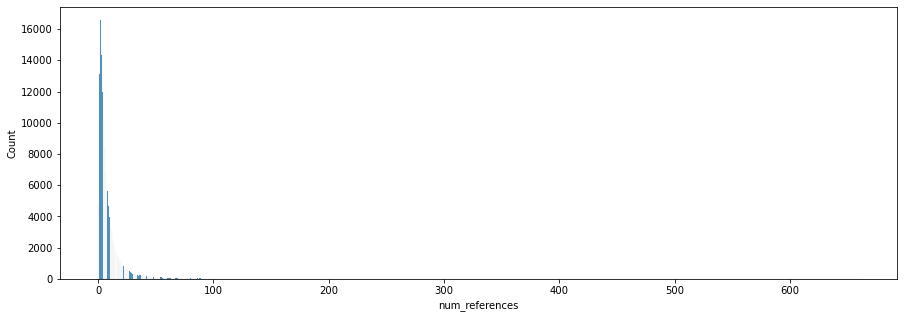

<IPython.core.display.Javascript object>

In [15]:
# Histplot of updated num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` remains highly right skewed.
- 25% of entries have 2 or fewer references, which may be a good cutoff to search for `known_for` values.
- Let us view the log transformation of the feature, both for the full dataset, and for `num_references` > 2.

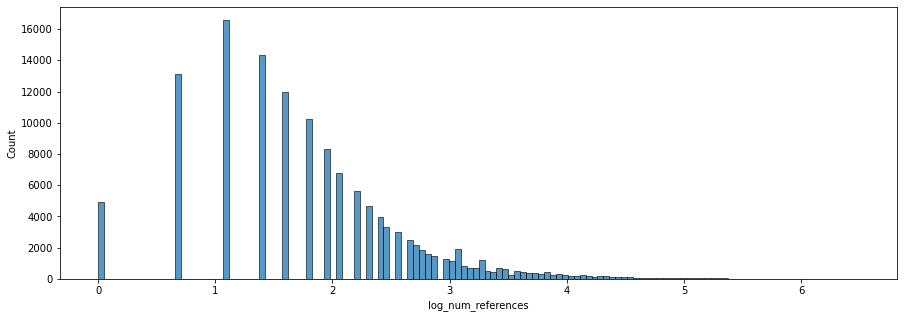

<IPython.core.display.Javascript object>

In [16]:
# Adding column for log_num_references
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x + 1))

# Histplot of log_num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="log_num_references")
plt.show()

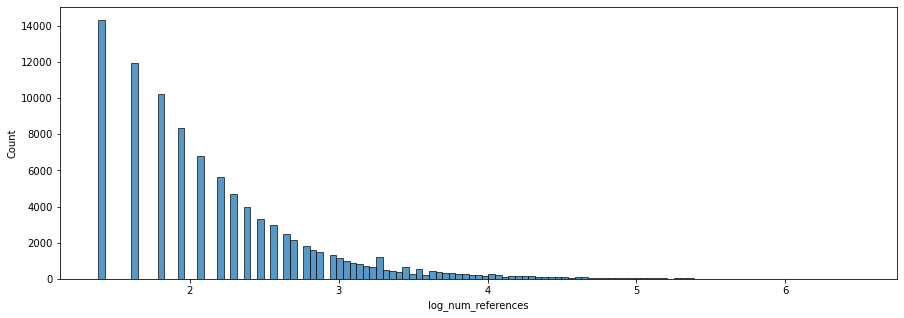

<IPython.core.display.Javascript object>

In [17]:
# Histplot of log_num_references where num_references > 2
plt.figure(figsize=(15, 5))
sns.histplot(data=df[df["num_references"] > 2], x="log_num_references")
plt.show()

#### Observations:
- The distribution is certainly more normalized with the log transformation, but follows a consistent curve for values > 2.
- For this analysis, we will focus on these more noted entries.

## Extracting `known_for` Data
Our goal will be to have some broader categories into which the specific values will fit.  `known_for` is a diverse feature, in that an individual may be known for a long-term role or roles, a specific event, a relationship with another person who is famous, etc.  So, to some extent we will see what we find and adapt as we go.

Also, we will abandon searching left to right as an individual may fit more than one category, and in no particular order.  For example, Ronald Reagan, is entered as "American actor and politician".  He is most known as the 40th president of The United States, so if we prioritized the first value, he would fit only into the category containing actor.  At the same time, it may have been his acting career that led to his political career.  Both arenas are relevant, so we will aim to capture all categories for an individual.

We will take the following approach:
1. create and check a list of unique values in `info_2` using value_counts, in ascending order.
2. using the pop() method, add each role to it's associated category's list, below, taking care to screen and clarify values that may have multiple meanings, and adding those clarified values to the lists as indicated.
3. combine the lists for each category into one dictionary.
4. Create a corresponding column for each category, initialized equal to 0.
5. search for the values in the dictionary and change the category column to 1 if at least 1 match is found.
6. Rather than importing our previous `other_species` list, we will start anew and include it in our search here.

#### Restricting our Dataset to Entries with More than 2 References

In [18]:
# Limiting the dataset to entries with > 2 references
df = df[df["num_references"] > 2]
print(f"There are {len(df)} remaining entries in the dataframe.")

There are 98060 remaining entries in the dataframe.


<IPython.core.display.Javascript object>

#### Finding `known_for` Roles in `info_2`

In [19]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [20]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [21]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [index for index in df.index if "politician" in df.loc[index, "info"]],
#         "info_2",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [22]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [23]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "politician and minister" in df.loc[index, "info"]]
# ]

<IPython.core.display.Javascript object>

In [24]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "and n politician"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [25]:
# Creating lists for each category
politics_govt_law = [
    "Māori activist and politician",
    "politician and a deputy leader of the Party of Regions",
    "politician known for urging crackdown on Tiananmen Square protests of",
    "politician and ambassador to the",
    "aboriginal politician",
    "and former Newfoundland politician",
    "politician and Lieutenant Governor of",
    "Sinn Féin politician",
    "Communist revolutionary and politician",
    "politician and former Conservative Party Chancellor of the Exchequer",
    "Republican politician from Maryland",
    "politician from West Belfast",
    "Queensland politician",
    "Peronist party politician and",
    "Peronist Party politician",
    "communist politician and solicitor",
    "politician and solicitor",
    "pro politician",
    "politician and local government leader",
    "disability rights activist and Green politician",
    "Conservative Party politician",
    "Naga politician",
    "Democratic Maryland politician",
    "politician and federal judge",
    "Progressive Conservative politician",
    "politician and mayor of Anderlecht",
    "Serb politician and",
    "exiled politician and Foreign Minister",
    "politician and vice president",
    "gay and lesbian rights activist and politician",
    "landowner and Conservative politician",
    "politician and chairman of the House Judiciary Committee during the impeachment process against Richard Nixon",
    "revolutionary politician and",
    "politician and political activist",
    "politician and acting president of",
    "Labour politician and female life peer",
    "politician and fifth President of from to",
    "attorney and Republican politician",
    "feminist and politician",
    "politician and Mayor of Sarajevo",
    "politician and social activists",
    "politician ; first black woman elected to a provincial legislature",
    "former politician and minister in the Whitlam government",
    "politician and then incumbent Speaker of Parliament",
    "politician and former Chief Justice of",
    "politician and Governor of Idaho from to",
    "lawyer and politician Senator from Delaware from to",
    "politician chairman of the People Party of",
    "politician and minister of state",
    "politician and member of the House of Representatives"
    "politician and member of the House of Representatives for",
    "politician and vice President of",
    "populist politician",
    "politician and second son of Saddam Hussein",
    "politician and eldest son of Saddam Hussein",
    "politician; former Premier of Nova Scotia",
    "Democratic Republic of the politician",
    "politician and communist leader",
    "Illinois anti corruption activist",  # Must come before crime
    "Papua New anti corruption activist and",
    "anti corruption and women rights activist",
    "Sindhi nationalist politician",
    "politician Mayor of San Bruno",
    "politician and disability campaigner",
    "politician and housing activist",
    "chief and politician",
    "politician and paramount chief",
    "politician and dictator",
    "community organizer and politician",
    "Gibraltarian lawyer and politician",
    "defense attorney and politician",
    "politician and disability rights campaigner",
    "politician and political campaign chairwoman",
    "politician and Knesset member",
    "Papua New politician",
    "Labour politician and peer",
    "politician and party functionary",
    "UAE politician",
    "communist era politician",
    "politician and language activist",
    "Romani politician",
    "politician and Arab nationalist figure",
    "politician and environmental activist",
    "Virgin Islander politician and attorney",
    "public servant and politician",
    "politician and official",
    "and politician in Valencian Community",
    "politician and colonial administrator",
    "politician and Neo activist",
    "jurist and nationalist politician",
    "politician and monarchist",
    "First Nations leader and politician",
    "Arab politician",
    "politician and campaign organizer",
    "politician and defector",
    "political strategist and politician",
    "politician involved in Mensalão scandal",
    "politician and chief judge",
    "politician and negotiator",
    "and Unionist politician",
    "politician from Southern Illinois and",
    "politician and first Chief Minister",
    "politician and Mayor of Boston",
    "wildlife conservationist and politician",
    "and Labour Party politician",
    "Labour politician and minister",
    "and Marxist politician",
    "politician and th Prime Minister of land",
    "politician and Governor of Minnesota",
    "nationalist and pan Turkic politician",
    "politician and House of Representatives representative",
    "politician and Chief Minister of Punjab",
    "politician Lieutenant Governor of Manitoba",
    "politician and rd Governor of Michigan and father of Mitt Romney",
    "politician and Queensland Legislative Assembly member",
    "lawyer and politician and Governor of",
    "labor activist and politician",
    "politician and President of istan",
    "lawyer and politician in",
    "politician and independence advocate",
    "politician and third Sarsanghchalak of the RSS",
    "politician and community activist",
    "politician and Governor of Nevada",
    "politician of the National Party",
    "communist politician and statesman in the Democratic Republic",
    "nobleman and Conservative politician",
    "right wing politician and",
    "politician and prime minister",
    "politician and Governor of Punjab",
    "communist politician and leader of the GDR",
    "and anti communist politician",
    "politician and leader of Communist Party of",
    "politician and fourth Governor general of",
    "politician and nazi collaborator",
    "chieftain and politician",
    "Virgin Islander politician and first Chief Minister of the Virgin Islands",
    "politician who served as the th Premier of Manitoba",
    "politician of the Labour Party",
    "politician and a leader of the Communist Party of",
    "politician from Massachusetts",
    "politician from Iowa",
    "politician and one of the leaders of the national emancipation movement",
    "politician and jurist who was the th Governor of Virginia",
    "politician who was the first woman elected to the New Senate",
    "attorney and politician who served as President of the Vermont State Senate",
    "politician and Chief Minister of Sabah",
    "politician and former President of",
    "politician and Secretary of State",
    "politician and governor of Arkansas",
    "politician and Vice Premier",
    "politician of the Republican Party",
    "politician and first Prime Minister of",
    "politician leader of the People Republic of",
    "politician and parliamentarian",
    "jurist and politician from",
    "politician and the th Prime Minister of",
    "and post war politician",
    "communist diplomat and politician",
    "Ulster Unionist Party politician",
    "politician and mentor teacher of Vladimir Putin and Dmitry Medvedev",
    "s politician and Prime Minister",
    "politician of the Communist Party",
    "anti colonial activist and politician",
    "minister and oppositional politician",
    "politician and rival of Robert Mugabe",
    "Prominent politician and minister",
    "politician and th Governor of",
    "politician and social reformer",
    "politician and nd governor of Kansas",
    "oldest elected politician",
    "politician and four term President of",
    "political aide and politician",
    "politician and Vice President of the Republic of",
    "politician who served as Leader of the House of Lords",
    "politician and Vice President of the National Congress",
    "politician and Chief Minister of Karnataka",
    "politician and gender equality activist",
    "politician and father of Al Gore",
    "politician and founding member of SWAPO",
    "politician and president of",
    "politician and speaker",
    "politician and the only president of the Republic of Herzeg",
    "ian politician and Chief Minister of",
    "politician and propogandist",
    "politician and mayor of Dallas",
    "politician and mayor of Denver",
    "politician and Foreign Minister",
    "pro Beijing politician and lawyer",
    "peer and Labour politician",
    "politician and a civil servant",
    "Libertarian Party politician",
    "politician and Supreme Court judge",
    "pan ist politician",
    "politician and wife of Vice President Hubert Humphrey",
    "politician and populist",
    "politician and former president of",
    "communist activist and East politician",
    "politician and Gandhian",
    "anti communist and nazi politician",
    "politician and former Prime Minister and President",
    "politician and doctor of law",
    "Attorney General and politician",
    "communist politician and theorist",
    "Democratic Party Party politician",
    "politician and governor of the Central Bank",
    "East y dissident and politician",
    "politician and Corsican nationalism leader",
    "politician and Azawad separatist",
    "anti Mafia activist and politician",
    "Inuit politician and human rights activist",
    "political era dissident and politician",
    "politician and sex worker advocate",
    "politician and prefect",
    "politician and tribal chief",
    "politologist and politician",
    "politician and ruralist",
    "politician and Attorney for the Southern District of",
    "politician and disability advocate",
    "anti nuclear activist and politician",
    "politician and political strategist",
    "Antillean politician",
    "Arabian prince and politician",
    "Iñupiat politician",
    "ni politician",
    "Ojibwe politician",
    "librist and politician",
    "civic leader and politician",
    "politician and secessionist",
    "era diplomat and politician",
    "political consultant",
    "politician and prosecutor",
    "health advocate and politician",
    "Herero politician",
    "LGBT activist and politician",
    "politician and administrative law judge",
    "Colony politician",
    "politician and LGBT rights activist",
    "politician and presidential advisor",
    "politician and captain",
    "politician TD",
    "justice and politician",
    "politician and pro independence activist",
    "noble and politician",
    "Lakota politician",
    "politician and disability rights activist",
    "politician and royal",
    "politician and trans activist",
    "Mahoran politician",
    "hereditary peer and politician",
    "politician and Tlingit elder",
    "and eventual politician",
    "politician and political aide",
    "feudal lord and politician",
    "exiled politician",
    "Quechua politician",
    "politician and student activist",
    "agricultural economist and politician",
    "politician and anti junta activist",
    "politician and anti apartheid activist",
    "public official and politician",
    "revolutionary leader and politician",
    "lobbyist and politician",
    "Makah tribal politician and",
    "opposition politician and leader of Group",
    "politician and presidential candidate",
    "politician and political leader",
    "federal judge and politician",
    "Khmer Rouge politician",
    "politician and Rural Solidarity activist",
    "communist activist and politician",
    "colonial politician",
    "politician and district attorney",
    "Pima politician",
    "Muscogee politician",
    "politician and global poverty campaigner",
    "Gwich'in politician and",
    "Mi'kmaq politician",
    "Quebecois politician",
    "Gwich'in politician",
    "senior politician",
    "Communist politician",
    "politician for minority",
    "federal and politician",
    "politician and propagandist",
    "Māori leader and politician",
    "s politician and coup leader",
    "separatist politician",
    "politician and lobbyist",
    "tribal politician and",
    "Cree politician and band chief",
    "Bougainvillean politician",
    "Virgin Islander judge and politician",
    "Iroijlaplap and politician",
    "politician MP for Lewisham West",
    "ambassador and politician",
    "politician and civil rights attorney",
    "politician and Premier of",
    "civil rights leader and politician",
    "politician and dissident",
    "politician and environmentalist",
    "politician and women rights activist",
    "politician and cabinet minister",
    "politician and Member of Parliament",
    "politician and mayor",
    "human rights activist and politician",
    "politician and Deputy Prime Minister of",
    "republican and politician",
    "politician and Governor of",
    "politician and Prime Minister of",
    "pro life activist and politician",
    "socialist politician",
    "Republic politician",
    "politician and community leader",
    "Republican Party politician",
    "social activist and politician",
    "politician and political prisoner",
    "administrator and politician",
    "Arabian politician",
    "Liberal Democrat politician",
    "tribal politician",
    "partisan and politician",
    "transgender politician",
    "landowner and politician",
    "local politician",
    "politician and MP",
    "politician and bureaucrat",
    "prince and politician",
    "political activist and politician",
    "Party politician",
    "Polynesian politician",
    "nobleman and politician",
    "politician and public servant",
    "far right politician",
    "tribal leader and politician",
    "environmentalist and politician",
    "politician and government official",
    "politician and civil servant",
    "politician and opposition leader",
    "independence activist and politician",
    "politician and a member of Parliament",
    "politician and advocate",
    "politician and feminist",
    "politician and partisan",
    "Trotskyist politician",
    "politician and President of",
    "women rights activist and politician",
    "Labour Party politician",
    "Bissauan politician",
    "politician and social activist",
    "Virgin Islands politician",
    "Fine Gael politician",
    "politician and government minister",
    "politician and aristocrat",
    "politician and barrister",
    "solicitor and politician",
    "peer and politician",
    "politician and civil rights activist",
    "politician and magistrate",
    "politician and human rights activist",
    "Gibraltarian politician",
    "East politician",
    "politician and revolutionary",
    "politician and legislator",
    "anti apartheid activist and politician",
    "Conservative politician",
    "Democratic politician",
    "nationalist politician",
    "barrister and politician",
    "Fianna Fáil politician",
    "politician and Prime Minister",
    "politician and independence activist",
    "revolutionary and politician",
    "civil rights activist and politician",
    "aristocrat and politician",
    "politician and peer",
    "s politician",
    "politician and attorney",
    "royal and politician",
    "politician and minister",
    "activist and politician",
    "civil servant and politician",
    "politician and life peer",
    "communist politician and statesman",
    "communist politician and",
    "and communist politician",
    "communist politician",
    "politician and activist",
    "politician and economist",
    "attorney and politician",
    "politician and jurist",
    "judge and politician",
    "jurist and politician",
    "politician and judge",
    "economist and politician",
    "diplomat and politician",
    "politician and lawyer",
    "politician and diplomat",
    "lawyer and politician",
    "politician from",
    "politician in",
    "Māori politician",
    "politician and President",
    "South politician and",
    "and Republican politician",
    "Republican politician",
    "politician and Senator",
    "politician and governor of",
    "politician statesman",
    "politician and statesman",
    "politician and nationalist",
    "politician and l",
    "Serb politician",
    "politician and pacifist",
    "politician Representative",
    "Northern politician",
    "Southern politician",
    "politician and Governor",
    "and politician and",
    "Liberal politician",
    "politician and former",
    "prominent politician and",
    "and one time politician",
    "Labour politician",
    "and n politician",
    "conservative politician",
    "federal politician",
    "republican politician",
    "Labor politician",
    "politician and",
    "attorney and a politician",
    "and a politician",
    "and politician",
    "politician",
]

arts = []
sports = ["trotting", "pesilat"]
sciences = []

business_farming = ["quantity surveyor", "chartered surveyor"]
academia_humanities = [
    "and academic lawyer",
]
law_enf_military_operator = [
    "supporter of the Tiger rebels",
    "military lawyer",
]
spiritual = ["rātana morehu", "Faqīh"]
social = []
crime = ["and corrupt", "corrupt", "dacoit"]
event_record_other = ["ETA victim"]
other_species = []

<IPython.core.display.Javascript object>

#### Observations:
- After flushing out the various values containing "politician", it is a good idea to clear those values out of `info_2` now.

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [26]:
# Combining separate lists into one dictionary
known_for_dict = {
    "sciences": sciences,
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Initializing `known_for` Category Columns

In [27]:
# Creating columns for each category
for category in known_for_dict:
    df[category] = 0

# Checking a sample
df.sample()

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species
131489,13,Lillian M. Lowery,", 67–68, American school superintendent.",https://en.wikipedia.org/wiki/Lillian_M._Lowery,9,2022,April,None,None,school superintendent,None,None,None,None,None,None,None,None,None,67.5,None,United States of America,None,None,2.302585,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

#### Extracting Category from `info_2` with `known_for_dict`

In [28]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df[df['politics_govt_law'] ==1].sample(2)

CPU times: total: 4min 26s
Wall time: 4min 26s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
121625,21,Henri Mouton,", 87, Belgian politician, senator .",https://en.wikipedia.org/wiki/Henri_Mouton_(politician),3,2021,April,,None,,senator,None,None,None,None,None,None,None,None,87.0,None,Belgium,None,1981 1985,1.386294,0,0,0,0,0,0,0,0,1,0,0,0,1
127400,19,Edgardo Labella,", 70, Filipino politician, mayor of Cebu City .",https://en.wikipedia.org/wiki/Edgardo_Labella,88,2021,November,since,None,,mayor of Cebu City,None,None,None,None,None,None,None,None,70.0,None,Philippines,None,since 2019,4.488636,0,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [29]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 86053 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict`, repeating the same process.

#### Finding `known_for` Roles in `info_2`

In [30]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [31]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [32]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[[index for index in df.index if "actor" in df.loc[index, "info"]], "info_2",]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [33]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [34]:
# # Example code to quick-screen values that may overlcontractorap categories
# df.loc[[index for index in df.index if "factor" in df.loc[index, "info"]]]

<IPython.core.display.Javascript object>

In [35]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "n actor"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [36]:
# Creating lists for each category
politics_govt_law = [
    "urban planner and the father of actor Kevin and musician Michael Bacon",  # Must go before arts
    "Union Minister",
    "plaintiff winner against NASA contractor",
    "economist who examined factor endowment",
]

arts = [
    "wuxia actor",
    "actor and member of the",
    "actor who portrayed Tarzan in six films",
    "Tony winning actor and panelist",
    "actor and television show host",
    "Noh actor and director",
    "actor and folk singer",
    "character actor and movie trailer narrator",
    "horror film producer and actor",
    "Tony Award winning actor of stage and screen",
    "Bollywood character actor",
    "actor in gay erotic films and",
    "voice actor and actor",
    "actor in adventure films",
    "editor and voice actor",
    "and actor better known as Huracán Ramírez",
    "technical advisor and actor",
    "actor and comedian Saturday Night Live",
    "film actor who normally played Western villains",
    "actor who appeared in over",
    "stage actor and award winning",
    "movie and television actor",
    "actor and documentary maker",
    "actor and voice artist voice of the Flower Pot Men",
    "Tony and Emmy Award winning actor",
    "actor Emmy Award winning",
    "actor and television game show host",
    "pornographic actor and AVN Hall of Famer",
    "former Mr Universe and actor",
    "child actor and sound editor",
    "Tony Award winning actor",
    "character actor and voice of Baby Huey",
    "voice actor and ventriloquist",
    "character and voice actor",
    "glamour photographer and actor",
    "character actor and photographer",
    "character actor and voice actor",
    "comedy actor and singer",
    "actor and artistic director",
    "actor and children television host",
    "comedian and television actor",
    "science fiction actor",
    "film composer and actor",
    "Gibraltarian character actor",
    "actor and television production manager",
    "pornographic film actor and director",
    "set dresser and actor",
    "radio actor and theatrical agent",
    "Yiddish theatre actor",
    "theater actor and director",
    "actor and voice over actor",
    "country music singer and television actor",
    "actor and audiobook narrator",
    "character actor and screenwriter",
    "actor and narrator",
    "actor and pop singer",
    "actor and talent agent",
    "actor director and producer",
    "Igorot actor",
    "silent film child actor",
    "stand up comedian",
    "country musician and actor",
    "actor and radio announcer",
    "Marathi and film actor",
    "comic actor ′",
    "silent film actor",
    "Academy Award nominated actor",
    "actor and puppeteer",
    "actor and disc jockey",
    "based actor",
    "Bollywood actor and",
    "comedy actor and director",
    "drama and comedy actor",
    "actor and the son of Douglas Fairbanks",
    "television actor and producer",
    "actor and former child actor",
    "actor in and",
    "motion picture stuntman and actor",
    "operatic baritone and actor",
    "and actor and director",
    "masked wrestler and actor",
    "local television personality and actor",
    "actor and television announcer",
    "theatre and television actor",
    "character actor and comedian",
    "child actor and television journalism pioneer",
    "voice actor known for the voice of the cartoon cat Garfield",
    "radio and stage actor",
    "actor and rock and roll singer",
    "actor and television writer",
    "actor and film television director",
    "Broadway actor and television voice actor",
    "singer songwriter and child actor",
    "era actor",
    "radio personality and actor",
    "traditional pop singer and actor",
    "television and film writer and actor",
    "film and television actor and writer",
    "television and film character actor",
    "film actor and playwright",
    "folk music singer songwriter and actor",
    "actor and brother of Chespirito",
    "actor and stuntperson",
    "and actor and dancer",
    "radio DJ and actor",
    "voice actor and sound director",
    "actor and opera director",
    "musical theater actor",
    "radio and television actor and author",
    "radio and television actor",
    "actor of stage and screen",
    "pop music singer and actor",
    "disc jockey and voice over actor",
    "jazz musician and actor",
    "actor and Chicago children television entertainer",
    "vocalist and actor",
    "actor Judas in",
    "actor on Murphy Brown",
    "actor best known as The Master in",
    "actor and clown",
    "announcer and voice actor",
    "film and theatre actor",
    "voice over actor",
    "counter culture actor",
    "actor comedian",
    "based film and TV actor",
    "actor and comic",
    "actress and daughter of actor Jean Louis Trintignant",
    "actor and radio and television personality",
    "actor and talk show host",
    "film actor of descent",
    "production designer and actor",
    "movie and TV actor",
    "actor and publicist",
    "druze singer and actor",
    "tango singer and actor",
    "concert bass baritone singer and actor",
    "child actor and comedian",
    "television director and character actor",
    "actor and Broadway performer",
    "actor and Oscar winner",
    "film and television actor and casting director",
    "actress and wife of actor",
    "actor and producer; husband of Angela Lansbury",
    "actor famous for his alter ego",
    "actor in films and television",
    "radio comedian and actor",
    "motion picture director and actor",
    "Mohawk actor and stuntman",
    "character actor and children author",
    "animator and voice actor",
    "gay pornographic actor",
    "actor and DJ",
    "voice actor and author",
    "actor and film and jazz musician",
    "Yan nhaŋu actor",
    "voice actor and impressionist",
    "fashion model and actor",
    "Hall of Fame actor and theatre director",
    "novelist and actor",
    "pornographic film actor and comedian",
    "film actor and comedian",
    "actor and theater manager",
    "bolero singer and actor",
    "actor and adman",
    "stage magician and actor",
    "Sámi actor",
    "cookbook author and actor",
    "acrobat and actor",
    "voice actor and radio personality",
    "rock singer and actor",
    "opera director and actor",
    "comedian and film actor",
    "jazz vocalist and actor",
    "photographer and actor",
    "talk show host and actor",
    "voice actor and animator",
    "magician and actor",
    "television and radio personality and voice actor",
    "actor and stunt double",
    "actor and impersonator",
    "actor and TV show host",
    "voice actor and director",
    "indigenous activist and actor",
    "screenwriter and voice actor",
    "artist and actor",
    "children author and actor",
    "folk musician and actor",
    "baritone and actor",
    "jazz singer and actor",
    "film critic and actor",
    "writer and stage actor",
    "humorist and actor",
    "Sac and Fox actor",
    "assistant director and actor",
    "actor and reality show contestant",
    "actor and theatre and film director",
    "scriptwriter and actor",
    "choreographer and actor",
    "voice actor and television producer",
    "journalist and voice actor",
    "voice director and actor",
    "actor and painter",
    "puppeteer and voice actor",
    "dancehall reggae artist and actor",
    "indigenous actor and singer",
    "Cantopop composer and actor",
    "dubbing and voice actor",
    "actor and music composer",
    "actor and pop artist",
    "flamenco singer and actor",
    "musical actor and producer",
    "costume designer and actor",
    "operatic tenor and actor",
    "theatrical actor and director",
    "saxophonist and actor",
    "rapper and actor",
    "voice actor and dubbing director",
    'actor and "man with half a body" due to sacral agenesis',
    "comedy magician and actor",
    "actor in theatre and cinema",
    "gay porn actor",
    "actor and director in Bollywood films",
    "getai performer and actor",
    "Kabuki actor",
    "musical theatre actor",
    "actor and pop rock singer",
    "radio and television writer and actor",
    "theatrical director and actor",
    "film and voice actor and author",
    "news anchor",
    "Cajun humorist and actor",
    "Golden Bell award winning television actor and theatre director",
    "stage actor and acting coach",
    "Tollywood film actor",
    "actor and coupletist",
    "comedian and comedic actor",
    "BAFTA winning actor and",
    "voice actor and executive director",
    "cartoonist and actor",
    "music industry executive and actor",
    "voice actor and narrator",
    "actor and chef",
    "dialect coach and actor",
    "quiz show host and actor",
    "stand up comedian and actor",
    "stage and screen actor",
    "television and stage director",
    "actor and game show host",
    "film producer and former child actor",
    "operatic baritone and stage actor",
    "and theater and film actor",
    "actor and novelist",
    "actor and first television host of the game show",
    "fashion model and daughter of actor Marlon Brando",
    "comedian and character actor",
    "drag artist and actor",
    "broadcaster and actor",
    "actor and dubbing artist",
    "television personality and actor",
    "film actor and editor",
    "actor and TV presenter",
    "voice actor and writer",
    "actor singer",
    "tenor and musical theater actor",
    "film and television director",
    "actor and TV personality",
    "television continuity announcer",
    "actor and language dub artist",
    "comedian and comic actor",
    "actor and jazz and traditional pop singer",
    "television and film actor and",
    "television writer and voice actor",
    "country singer songwriter and actor",
    "actor and folk theatre artist",
    "actor and theatre manager",
    "Nandi Award winning actor",
    "actor and mime",
    "ballet dancer and actor",
    "actor and stunt performer",
    "actor of theater and cinema",
    "kabuki actor",
    "television actor and screenwriter",
    "actor and drag queen",
    "actor and stand up comedian",
    "actor and radio personality",
    "actor and dramatist",
    "film and voice actor",
    "Kathakali actor",
    "actor and poet",
    "actor and voice artist",
    "and film and theater actor",
    "pornographic actor and director",
    "pornographic film actor",
    "folk singer and actor",
    "Kannada actor",
    "theatre actor and director",
    "actor and rapper",
    "actor and stunt director",
    "actor and jazz musician",
    "television presenter and actor",
    "television host and actor",
    "television producer and actor",
    "actor and singer songwriter",
    "actor and theatre producer",
    "television announcer and actor",
    "comedian and voice actor",
    "film and theater actor",
    "actor and television personality",
    "actor and opera singer",
    "actor and dancer",
    "theatre and film actor",
    "model and actor",
    "pop singer and actor",
    "actor and filmmaker",
    "actor and theater director",
    "film actor and director",
    "actor and performer",
    "actor and choreographer",
    "screenwriter and actor",
    "actor and broadcaster",
    "voice actor and singer",
    "theater and film actor",
    "stage actor and director",
    "dancer and actor",
    "actor and magician",
    "theatre director and actor",
    "actor and playback singer",
    "actor and television presenter",
    "filmmaker and actor",
    "stage and television actor",
    "xiangsheng actor",
    "film actor and producer",
    "actor and entertainer",
    "actor and television producer",
    "actor and composer",
    "actor and television director",
    "film and stage actor",
    "actor and songwriter",
    "poet and actor",
    "stage and film actor",
    "opera singer and actor",
    "stuntman and actor",
    "actor and television host",
    "stage director and actor",
    "singer songwriter and actor",
    "actor and producer",
    "actor and model",
    "theater actor",
    "television and film actor",
    "writer and actor",
    "comedy actor",
    "actor and film producer",
    "comic actor",
    "actor and musician",
    "actor and author",
    "actor and stage director",
    "playwright and actor",
    "pornographic actor and",
    "pornographic actor",
    "television actor",
    "actor and theatre director",
    "actor and stuntman",
    "musician and actor",
    "actor and screenwriter",
    "film director and actor",
    "actor and writer",
    "actor and playwright",
    "film and television actor",
    "actor and film director",
    "actor and voice actor",
    "character actor",
    "actor and singer",
    "singer and actor",
    "Bollywood film actor",
    "film actor and",
    "and film actor",
    "film actor",
    "comedian and actor",
    "actor and director",
    "actor and comedian",
    "voice actor and announcer",
    "anime voice actor",
    "voice actor and",
    "voice actor",
    "actor and scriptwriter",
    "composer and actor",
    "television director and actor",
    "director and actor",
    "author and actor",
    "actor and artist",
    "actor and announcer",
    "actor and photographer",
    "Emmy Award winning actor",
    "Academy Award winning actor",
    "Broadway actor",
    "comedic actor",
    "movie actor",
    "film producer and actor",
    "Hall of Fame actor",
    "radio personality",
    "actor and presenter",
    "actor and stunt man",
    "porn actor",
    "announcer and actor",
    "stage actor and",
    "stage actor",
    "radio actor and",
    "radio actor",
    "Emmy winning actor",
    "former child actor",
    "child actor and",
    "child actor",
    "manager and actor",
    "actor of films",
    "theatre actor",
    "former actor",
    "Bollywood actor",
    "and daughter of actor",
    "actor and an",
    "actor and",
    "and actor",
    "n actor",
    "contractor",
    "and art benefactor",
    "actor",
]
sports = [
    "luchador",
]
sciences = [
    "and chiropractor",
    "chiropractor",  # Must go before arts
]

business_farming = [
    "haulage contractor and entrepreneur",  # Must go before arts
    "contractor and billionaire",
    "developer and contractor",
    "building contractor",
    "businessman and factory co owner involved in Fisher Price toy recall",
]
academia_humanities = []
law_enf_military_operator = [
    "and private security contractor",  # Must go before arts
]
spiritual = []
social = [
    "and residential contractor",  # Must go before arts
]
crime = ["FBI fugitive", "yakuza lord", "and yakuza", "yakuza"]
event_record_other = ["civilian contractor", "factory worker"]  # Must go before arts
other_species = [
    "scarlet macaw actor",  # Must go before arts
    "Jack Russell Terrier dog actor",
    "Kodiak bear actor",
    "lemur actor",
    "walrus and animal actor",
    "dog actor",
    "canine actor",
]

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [37]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
    "arts": arts,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [38]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df[df['arts'] ==1].sample(2)

CPU times: total: 4min 34s
Wall time: 4min 35s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
129740,5,Anani Yavashev,", 89, Bulgarian actor .",https://en.wikipedia.org/wiki/Anani_Yavashev,3,2022,February,",",None,,None,None,None,None,None,None,None,None,None,89.0,None,Bulgaria,None,",",1.386294,0,0,0,0,0,1,0,0,0,0,0,0,1
56132,24,Sherman Hemsley,", 74, American actor , .",https://en.wikipedia.org/wiki/Sherman_Hemsley,22,2012,July,"superior vena cava syndrome, ,",None,,None,None,None,None,None,None,None,None,None,74.0,None,United States of America,None,"superior vena cava syndrome, ,",3.135494,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [39]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 80987 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` for the next iteration.

#### Finding `known_for` Roles in `info_2`

In [40]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [41]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [42]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [index for index in df.index if "footballer" in df.loc[index, "info"]],
#         "info_2",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [43]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [44]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [
#         index
#         for index in df.index
#         if "footballer and administrator" in df.loc[index, "info"]
#     ]
# ]

<IPython.core.display.Javascript object>

In [45]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "s footballer"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [46]:
# Creating lists for each category
politics_govt_law = []

arts = []
sports = [
    "footballer for and Blackpool F C",
    "footballer for Stoke City F C",
    "footballer for Derry City",
    "cricketer for Glamorgan and footballer for Newport County",
    "footballer for West Bromwich Albion and Colchester United",
    "footballer for Feyenoord and",
    "rugby union footballer for",
    "international footballer and Norwich City record goalscorer",
    "who was oldest living AFL VFL footballer",
    "footballer for Hartlepool United",
    "footballer for Real Madrid",
    "footballer with Essendon",
    "footballer and former chairman of Sheffield United",
    "international footballer and coach",
    "footballer and athletic trainer",
    "footballer and football coach",
    "Olympic footballer and",
    "footballer and Olympic swimmer",
    "footballer with one cap",
    "Olympic bronze medal winning footballer",
    "association footballer and",
    "footballer and Olympian",
    "footballer and manager in the Football League",
    "professional rugby league footballer",
    "promising footballer",
    "footballer player and manager",
    "Serb footballer and manager",
    "former footballer and coach",
    "footballer and cup winning coach and manager",
    "footballer and Football World Cup champion",
    "footballer with Tottenham Hotspur and",
    "footballer at the Summer Olympics",
    "footballer for Manchester City &",
    "Ipswich Town footballer",
    "Leicester City footballer",
    "Manchester City footballer & Grimsby Town manager",
    "footballer for Birmingham City",
    "footballer for FC Barcelona",
    "footballer and Olympic champion",
    "footballer and youth trainer",
    "rugby league footballer and selector",
    "WANFL footballer",
    "footballer and sports executive",
    "rugby league footballer and coach",
    "Olympic international footballer",
    "AFL footballer",
    "WAFL footballer",
    "Arabian footballer",
    "footballer and sporting executive",
    "footballer and hurler",
    "ice hockey player and footballer",
    "footballer and tennis player",
    "footballer and umpire",
    "Olympic footballer[]",
    "footballer and athlete",
    "footballer and administrator",
    "SANFL footballer",
    "footballer Norwich",
    "sports administrator and footballer",
    "Olympic and World Cup footballer",
    "Olympic footballer and coach",
    "Olympic silver medallist footballer",
    "rugby union and professional rugby league footballer",
    "Hall of Fame VFL footballer",
    "rugby footballer and coach",
    "Olympic champion footballer",
    "Hall of Fame footballer",
    "footballer player",
    "association footballer",
    "World Cup champion footballer",
    "rugby union and rugby league footballer",
    "hurler and footballer",
    "rules footballer and coach",
    "footballer and ice hockey player",
    "footballer and football manager",
    "footballer and referee",
    "footballer[]",
    "footballer []",
    "rugby league footballer",
    "Olympic footballer",
    "footballer and manager",
    "rules footballer",
    "footballer and coach",
    "international footballer",
    "professional footballer",
    "VFL footballer",
    "footballer and cricketer",
    "rugby footballer",
    "cricketer and footballer",
    "rugby union footballer",
    "era footballer",
    "World Cup footballer",
    "footballer and sports",
    "s footballer",
    "former footballer",
    "footballer for",
    "and footballer",
    "footballer and",
    "footballer",
]
sciences = []

business_farming = []
academia_humanities = []
law_enf_military_operator = []
spiritual = []
social = []
crime = []
event_record_other = []
other_species = []

<IPython.core.display.Javascript object>

In [47]:
# Hard-coding entry with cause of death in info_2
index = df[df["link"] == "https://en.wikipedia.org/wiki/Marc-Vivien_Fo%C3%A9"].index
df.loc[index, "cause_of_death"] = "collapsed and died on the football pitch in Lyon"
df.loc[index, "info_2"] = "footballer"

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [48]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [49]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df[df['sports'] ==1].sample(2)

CPU times: total: 1min
Wall time: 1min


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
56886,9,John McCarthy,", 22, Australian AFL footballer , fall from a building.","https://en.wikipedia.org/wiki/John_McCarthy_(Australian_rules_footballer,_born_1989)",12,2012,September,Port Adelaide,None,,fall from a building,None,None,None,None,None,None,None,None,22.0,None,Australia,None,Port Adelaide,2.564949,0,0,0,0,0,0,1,0,0,0,0,0,1
82565,10,Alex Govan,", 86, Scottish footballer .",https://en.wikipedia.org/wiki/Alex_Govan,20,2016,June,"Plymouth Argyle, Birmingham City",None,,None,None,None,None,None,None,None,None,None,86.0,None,Scotland,None,"Plymouth Argyle, Birmingham City",3.044522,0,0,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [50]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 77723 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` for the next iteration.

#### Finding `known_for` Roles in `info_2`

In [51]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [52]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [53]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [index for index in df.index if "actress" in df.loc[index, "info"]], "info_2",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [54]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [55]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "politician and minister" in df.loc[index, "info"]]
# ]

<IPython.core.display.Javascript object>

In [56]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "s actress"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [57]:
# Creating lists for each category
politics_govt_law = [
    "wife of prince Nakkhatra Mangala",
]

arts = [
    "pornographic actress and movie producer",
    "voice actress and actress and tokusatsu legend",
    "classical dancer and stage actress",
    "adult film actress",
    "B movie and TV actress",
    "actress also associated with s art scene",
    "Māori actress and artist",
    "screen and television actress",
    "actress and opera",
    "Bollywood actress",
    "cult film actress",
    "and actress and voice actress",
    "actress and television director",
    "dwarf actress",
    '"Venezuelan" B movie actress',
    "actress Little Eva in the first film adaptation of",
    "actress and operatic soprano",
    "actress with dwarfism",
    "voice actress and singer",
    "Oscar winning actress of stage and screen",
    "television and Tony Award winning stage actress",
    "TV and film actress",
    "theatre and film actress",
    "actress and costume designer",
    "softcore model and actress",
    "actress and spokesmodel",
    "Emmy and Tony Award winning actress",
    "children writer and actress",
    "actress known for beach party films of s",
    "pin up model and actress",
    "soap opera actress for Televisa",
    "lyric writer and actress",
    "actress and pin up girl",
    "based actress",
    "actress and sculptor",
    "actress and ballet dancer",
    "Broadway theatre actress",
    "theatre actress and producer",
    "actress soprano",
    "violinist and actress",
    "Broadway actress and MGM studio executive",
    "dwarf dancer and actress",
    "first female actress of cinema",
    "stage actress and director",
    "artist model and film actress",
    "script supervisor and voice actress",
    "film actress and musician",
    "singer and actress and member of The Andrews Sisters",
    "film and television actress and voice actress",
    "silent film era actress",
    "s B movie actress",
    "actress in the era of old time radio and the early years of television",
    "actress popular in the s and early s",
    "silent film actress and dancer",
    "B movie actress",
    "actress of stage and film",
    "television personality and actress",
    "belly dancer and actress",
    "theater and film actress",
    "comic actress and singer",
    "stage performer and film actress",
    "actress of stage and screen",
    "opera singer and film actress",
    "child actress of the silent era",
    "beauty contestant and actress",
    "television and theatre actress",
    "television  and actress",
    "singer & actress",
    "R&B singer and actress",
    "film actress and producer",
    "actress and voice over artist",
    "actress and pin up star",
    "actress and stage instructor",
    "vaudeville and silent film actress",
    "theater and movie actress",
    "actress and mistress of the minister Joseph Goebbels",
    "actress and Screen Actors Guild official",
    "child actress in silent films",
    "actress of stage and television",
    "Broadway and film actress",
    "screenwriter and actress",
    "stage actress and producer",
    "actress and cabaret performer",
    "sculptor and actress",
    "character actress of stage",
    "belly dancer and film actress",
    "actress and cabaret singer",
    "actress and nightclub entertainer",
    "actress and entertainer",
    "Internet personality and actress",
    "circus artist and actress",
    "flamenco pop singer and actress",
    "actress and production assistant",
    "actress and showgirl",
    "comedy writer and actress",
    "scriptwriter and actress",
    "actress and pitchwoman",
    "actress and painter",
    "singer songwriter and actress",
    "actress and accordionist",
    "model and television actress",
    "film and theatre actress",
    "actress and operatic mezzo soprano",
    "actress and glamour girl",
    "actress and soprano",
    "Yakut actress",
    "pornographic actress and magazine publisher",
    "showgirl and actress",
    "actress and Warhol superstar",
    "television producer and voice actress",
    "narrator and actress",
    "Mohawk actress",
    "opera soprano and theatre actress",
    "voice actress and writer",
    "actress and founder of",
    "operatic soprano and actress",
    "actress and children author",
    "film and television editor and actress",
    "voice actress and director of dubbing",
    "transgender actress and author",
    "film director and actress",
    "actress and illusionist",
    "transsexual actress",
    "television and stage actress",
    "continuity announcer and actress",
    "adult film actress and",
    "blues singer songwriter and pornographic actress",
    "strip teaser and actress",
    "radio and film actress",
    "stage and movie actress",
    "Grammy winning singer and actress",
    "AFI Award winning actress",
    "actress and food writer",
    "actress and television host",
    "stage actress and singer",
    "playback singer and actress",
    "actress and operatic singer",
    "television presenter and actress",
    "burlesque star and actress",
    "actress and novelist",
    "musical theatre actress and singer",
    "theatre actress and singer",
    "born actress",
    "big band singer and actress",
    "radio actress and disc jockey",
    "operatic soprano and musical theatre actress Tony Award",
    "painter and actress",
    "actress and impersonator",
    "sage actress",
    "actress and broadcaster",
    "stage actress and comedian",
    "Yiddish theatre actress",
    "actress and manager",
    "theater actress and producer",
    "actress and Broadway producer",
    "silent film actress and interior designer",
    "prima ballerina and actress",
    "operetta singer and film actress",
    "actress and voice dubbing artist",
    "actress and portrait painter",
    "television journalist and actress",
    "choreographer and actress",
    "César Award winning actress",
    "actress and talk show host",
    "dubber and actress",
    "stage and radio actress",
    "soprano and stage actress",
    "drag queen and actress",
    "television and radio actress",
    "pornographic film actress and model",
    "film actress and model",
    "actress and drama coach",
    "radio and television actress",
    "silent movie actress",
    "pornographic actress and model",
    "and operetta actress",
    "actress and casting director",
    "operatic mezzo soprano and actress",
    "mezzo soprano and actress",
    "soprano and actress",
    "actress and stuntwoman",
    "singer and voice actress",
    "film actress and dancer",
    "theatre director and actress",
    "singer and film actress",
    "cinema actress",
    "cabaret singer and actress",
    "actress and theater director",
    "Yue opera actress",
    "soap opera actress",
    "opera actress",
    "actress and beauty queen",
    "Hall of Fame pornographic actress",
    "actress and voice artist",
    "actress and talent agent",
    "actress and journalist",
    "actress and choreographer",
    "musical theatre actress",
    "actress and beauty pageant winner",
    "singer actress",
    "actress and stage director",
    "singer and stage actress",
    "actress and fashion model",
    "radio actress",
    "actress and radio presenter",
    "folk singer and actress",
    "television and film actress",
    "artist and actress",
    "Tony Award winning actress",
    "actress and producer",
    "film and stage actress",
    "actress and filmmaker",
    "playwright and actress",
    "actress and artist",
    "film actress and singer",
    "actress and photographer",
    "ballerina and actress",
    "actress and theatrical producer",
    "Hall of Fame actress",
    "author and actress",
    "fashion model and actress",
    "actress and theatre director",
    "ballet dancer and actress",
    "actress and author",
    "actress and film producer",
    "vedette and actress",
    "actress and playwright",
    "Academy Award winning actress",
    "actress and screenwriter",
    "actress and television personality",
    "pornographic film actress",
    "jazz singer and actress",
    "actress and television presenter",
    "writer and actress",
    "silent film actress",
    "opera singer and actress",
    "actress and director",
    "actress and film director",
    "stage and film actress",
    "character actress",
    "comedian and actress",
    "dancer and actress",
    "child actress",
    "film and television actress",
    "television actress",
    "pornographic actress",
    "actress and writer",
    "stage actress",
    "actress and voice actress",
    "actress and comedian",
    "actress and dancer",
    "and voice actress",
    "voice actress",
    "model and actress",
    "actress and model",
    "film actress and",
    "and film actress",
    "film actress",
    "singer and actress",
    "actress and singer",
    "theatre actress",
    "movie actress",
    "award winning actress",
    "theater actress",
    "actress in",
    "comedy actress",
    "s actress",
    "actress and poet",
    "actress on",
    "actress and",
    "and actress",
    "actress",
]
sports = []
sciences = []

business_farming = [
    "discoteque manager and husband of actress and singer\xa0Judy Garland",  # Must go before arts
]
academia_humanities = []
law_enf_military_operator = []
spiritual = []
social = []
crime = []
event_record_other = [
    "college student and aspiring actress",  # Must go before arts
]
other_species = []

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [58]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "event_record_other": event_record_other,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [59]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)
                    
# Checking a sample of rows
df[df['arts'] ==1].sample(2)

CPU times: total: 2min 58s
Wall time: 2min 58s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
43446,26,Gummadi,", 82, Indian actor.",https://en.wikipedia.org/wiki/Gummadi_(actor),17,2010,January,None,None,,None,None,None,None,None,None,None,None,None,82.0,None,India,None,None,2.890372,0,0,0,0,0,1,0,0,0,0,0,0,1
6160,28,Nirmala Devi,", 68, Indian film actress and singer.",https://en.wikipedia.org/wiki/Nirmala_Devi,4,1996,May,None,None,,None,None,None,None,None,None,None,None,None,68.0,None,India,None,None,1.609438,0,0,0,0,0,1,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [60]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 74629 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` for the next iteration.

#### Finding `known_for` Roles in `info_2`

In [61]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [62]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [63]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [index for index in df.index if "football player" in df.loc[index, "info"]],
#         "info_2",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [64]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [65]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "hunting gear salesman" in df.loc[index, "info"]]
# ]

<IPython.core.display.Javascript object>

In [66]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "football player and executive"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [67]:
# Creating lists for each category
politics_govt_law = []

arts = []
sports = [
    "football player Dallas Cowboys and a member of the Pro Football Hall of Fame",
    "professional football player and a member of the Pro Football Hall of Fame",
    "Choctaw Chickasaw gridiron football player and wrestler",
    "football player and a member of the Pro Football Hall of Fame",
    "football player and umpire",
    "football player and then manager",
    "football player and football coach",
    "football player and ice hockey coach",
    "football player and football placekicker with the Dallas Cowboys",
    "Olympic football player and manager gold medal",
    "football player and manager of Burnley",
    "football player with the San Francisco ers",
    "football player for Manchester United and Busby Babe",
    "professional football player and member of the Pro Football Hall of Fame",
    "football player and wrestler",
    "football player and member of Pro Football Hall of Fame",
    "football player and line judge",
    "football player with the Cleveland Browns",
    "football player and assistant coach",
    "college baseball and football player and coach",
    "football playerand a coach",
    "athlete and football player and manager",
    "rugby union and rugby league football player",
    "NBA football player and coach",
    "gridiron football player and sports",
    "football player and coach for the NFL Giants",
    "football player and hurler",
    "gridiron football player and umpire",
    "college football player and referee",
    "association football player and manager",
    "football player and football manager",
    "football player of ethnicity",
    "football player and Olympian",
    "football player and founder of Spartak Moscow",
    "rules football player and cricket player",
    "rugby union football player and coach",
    "football playerer",
    "basketball and gridiron football player",
    "ice hockey and football player and manager",
    "gridiron and football player",
    "gridiron football player and basketball coach",
    "gridironl football player",
    "freestyle wrestler and football player and coach",
    "NFL football player and NBL basketball player",
    "football player paralyzed during a game in",
    "Heisman Trophy winning football player",
    "football player and sports administrator",
    "international football player and manager",
    "lacrosse and football player",
    "football player and discus thrower",
    "football player and Hall of Famer",
    "Test cricketer and football player",
    "cricket and football player",
    "football player born with no legs",
    "arena football player and coach",
    "VFL football player and coach",
    "wrestler and football player",
    "football player and scout",
    "football player and world champion arm wrestler",
    "football player and sporting executive",
    "rugby league football player and coach",
    "Hall of Fame college football player and administrator",
    "baseball and football player",
    "football player and professional wrestler",
    "NFL Hall of Fame football player",
    "rugby league football player",
    "Hall of Fame football player and manager",
    "Olympic football player and referee",
    "NFL football player and coach",
    "Olympic sprint canoer and football player",
    "football player and fan",
    "Olympic football player and coach",
    "Olympic bronze medalist football player and coach",
    "Olympic silver medalist football player",
    "VFL football player and administrator",
    "football player and Olympic water polo player",
    "skier and football player",
    "AAFC football player",
    "football player and sport executive",
    "Hall of Fame football player and executive",
    "football player and official",
    "basketball and football player",
    "Olympic football player and manager",
    "cricketer and football player",
    "Hall of Fame CFL football player",
    "college and professional football player",
    "sprinter and football player",
    "football player and head coach",
    "rugby football player for",
    "rugby football player",
    "football player and administrator",
    "arena football player",
    "rules football player and coach",
    "football player and executive",
    "football player and referee",
    "Olympic football player",
    "Hall of Fame college football player",
    "Hall of Fame football player and coach",
    "VFL football player",
    "CFL football player",
    "college football player and coach",
    "gridiron football player and coach",
    "football player and member of the Pro Football Hall of Fame",
    "rules football player",
    "college football player and",
    "college football player",
    "and professional football player",
    "professional football player and",
    "professional football player",
    "Hall of Fame football player and",
    "Hall of Fame football player",
    "gridiron football player and",
    "and gridiron football player",
    "gridiron football player",
    "and football player and coach",
    "football player and coach",
    "football player and manager",
    "former football player",
    "AFL football player",
    "and association football player",
    "association football player",
    "university football player",
    "football player and member of the",
    "international football player",
    "former NFL football player",
    "NFL football player",
    "pro football player and",
    "football player and",
    "and football player",
    "football player",
]
sciences = []

business_farming = [
    "and hunting gear salesman",
    "hunting gear salesman",
]
academia_humanities = []
law_enf_military_operator = []
spiritual = []
social = []
crime = []
event_record_other = [
    "murder victim and ex wife of former football player O J Simpson",  # Must come before sports
]
other_species = []

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [68]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "sciences": sciences,
    "event_record_other": event_record_other,
    "sports": sports,
    "business_farming": business_farming,
    "arts": arts,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [69]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df[df['sports'] ==1].sample(2)

CPU times: total: 1min 20s
Wall time: 1min 20s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
110226,30,Alex Forsyth,", 91, Scottish footballer .","https://en.wikipedia.org/wiki/Alex_Forsyth_(footballer,_born_1928)",5,2020,March,"Albion Rovers, Darlington, East Stirlingshire",None,,None,None,None,None,None,None,None,None,None,91.0,None,Scotland,None,"Albion Rovers, Darlington, East Stirlingshire",1.791759,0,0,0,0,0,0,1,0,0,0,0,0,1
88017,25,Asbjørn Hansen,", 86, Norwegian footballer .",https://en.wikipedia.org/wiki/Asbj%C3%B8rn_Hansen,5,2017,March,"Sparta, national team",None,,None,None,None,None,None,None,None,None,None,86.0,None,Norway,None,"Sparta, national team",1.791759,0,0,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [70]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 71739 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will proceed to rebuild `known_for_dict` for the next iteration.

#### Finding `known_for` Roles in `info_2`

In [71]:
# Obtaining values for column and their counts
roles_list = df["info_2"].value_counts(ascending=True).index.tolist()

<IPython.core.display.Javascript object>

In [72]:
# # Code to check each value
# roles_list.pop()

<IPython.core.display.Javascript object>

In [73]:
# # Create specific_roles_list for above popped value
# specific_roles_list = (
#     df.loc[
#         [index for index in df.index if "baseball player" in df.loc[index, "info"]],
#         "info_2",
#     ]
#     .value_counts()
#     .index.tolist()
# )

<IPython.core.display.Javascript object>

In [74]:
# # Code to check each specific value
# specific_roles_list.pop()

<IPython.core.display.Javascript object>

In [75]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [index for index in df.index if "politician and minister" in df.loc[index, "info"]]
# ]

<IPython.core.display.Javascript object>

In [76]:
# # Example code to quick-check a specific entry
# df[df["info_2"] == "and baseball player"]

<IPython.core.display.Javascript object>

#### Creating Lists for Each `known_for` Category

In [77]:
# Creating lists for each category
politics_govt_law = []

arts = ["radio analyst"]
sports = [
    "Negro leagues baseball player",
    "former baseball player and manager",
    "baseball player who hit the first grand slam in the Mets history",
    "Baseball baseball player and coach",
    "baseball player and professional wrestling manager",
    "baseball player with the Cleveland Indians",
    "minor league baseball player and manager",
    "baseball player and father of San Francisco Giants ballplayer Barry Bonds",
    "baseball player and a member of the MLB Hall of Fame",
    "one armed baseball player",
    "baseball player and football coach",
    "minor league baseball player",
    "baseball player in the All Girls Professional Baseball League",
    "baseball player and golfer",
    "basketball and baseball player",
    "All baseball player",
    "baseball player and scout and",
    "baseball player and Gold Glove winning first baseman One of the first Hispanic players in the",
    "baseball player and manager in the Negro leagues",
    "baseball player and minor league manager",
    "Hall of Fame baseball player for the Nishitetsu Lions",
    "Olympic baseball player",
    "baseball player and boxing official",
    "Hall of Fame baseball player and manager",
    "baseball player who was second oldest living major league player",
    "professional baseball player and national softball team member",
    "football and baseball player Philadelphia Athletics",
    "cricketer and baseball player",
    "Collegiate Hall of Fame baseball player and coach",
    "baseball player and first manager of Toronto Blue Jays",
    "baseball player and executive",
    "baseball player and curler",
    "Republic baseball player",
    "professional baseball player and scout",
    "football and baseball player and coach",
    "Baseball baseball player",
    "MLB baseball player",
    "baseball player and scout",
    "football and baseball player",
    "baseball player and member of the MLB Hall of Fame",
    "AAGPBL baseball player",
    "professional baseball player",
    "Negro league baseball player",
    "Hall of Fame baseball player and",
    "Hall of Fame baseball player",
    "baseball player and coach",
    "baseball player and manager",
    "baseball player and",
    "baseball player",
]
sciences = []

business_farming = []
academia_humanities = []
law_enf_military_operator = []
spiritual = []
social = []
crime = []
event_record_other = []
other_species = []

<IPython.core.display.Javascript object>

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Lists of Values

In [78]:
# Combining separate lists into one dictionary
known_for_dict = {
    "social": social,
    "spiritual": spiritual,
    "academia_humanities": academia_humanities,
    "business_farming": business_farming,
    "sciences": sciences,
    "arts": arts,
    "sports": sports,
    "law_enf_military_operator": law_enf_military_operator,
    "politics_govt_law": politics_govt_law,
    "crime": crime,
    "event_record_other": event_record_other,
    "other_species": other_species,
}

<IPython.core.display.Javascript object>

#### Extracting Category from `info_2`

In [79]:
%%time

# Dictionary version
search_dict = known_for_dict

# Column to check
column = 'info_2'

# Dataframe
dataframe = df[column].notna()

# For loop to find role in column and extract it as category
for category, category_lst in search_dict.items():
    for role in category_lst:
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, category] = 1
                    df.loc[index, column] = item.replace(role, '').strip()

# Updating num_categories
df["num_categories"] = df[known_for_dict.keys()].sum(axis=1)

# Checking a sample of rows
df[df['sports'] ==1].sample(2)

CPU times: total: 31.3 s
Wall time: 31.4 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
51801,8,Valentin Ivanov,", 76, Russian football player and coach.","https://en.wikipedia.org/wiki/Valentin_Ivanov_(footballer,_born_1934)",6,2011,November,None,None,,None,None,None,None,None,None,None,None,None,76.0,None,Russia,None,None,1.945910,0,0,0,0,0,0,1,0,0,0,0,0,1
88710,1,Sam Mele,", 95, American baseball player , natural causes.",https://en.wikipedia.org/wiki/Sam_Mele,10,2017,May,"Boston Red Sox, Washington Senators and manager Minnesota Twins",None,,natural causes,None,None,None,None,None,None,None,None,95.0,None,United States of America,None,"Boston Red Sox, Washington Senators and manager Minnesota Twins",2.397895,0,0,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

#### Checking the Number of Rows without a First Category

In [80]:
#### Checking the number of rows without a first category
print(
    f'There are {len(df[df["num_categories"]==0])} entries without any known_for category.'
)

There are 70185 entries without any known_for category.


<IPython.core.display.Javascript object>

#### Observations:
- We will pause now to save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean4.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean4.db)

In [81]:
# Exporting dataframe

# Saving dataset in a SQLite database
conn = sql.connect("wp_life_expect_clean4.db")
df.to_sql("wp_life_expect_clean4", conn, index=False)

# Chime notification when cell executes
chime.success()

<IPython.core.display.Javascript object>

# [Proceed to Data Cleaning Part 5](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean5_thanak_2022_07_17.ipynb)